# Plotting the station on a map

## Python version

In [1]:
import sys

In [2]:
print(sys.version)

3.9.12 (main, Apr  5 2022, 06:56:58) 
[GCC 7.5.0]


## Import packages and data

In [3]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [4]:
url = 'https://gbfs.baywheels.com/gbfs/en/station_information.json'
req = requests.get(url)


In [5]:
df_sf = pd.DataFrame(req.json()['data']['stations']).drop(columns=['rental_uris'])

In [6]:
df_sf.columns

Index(['electric_bike_surcharge_waiver', 'eightd_station_services',
       'rental_methods', 'legacy_id', 'region_id', 'eightd_has_key_dispenser',
       'station_id', 'lon', 'capacity', 'external_id', 'short_name',
       'has_kiosk', 'lat', 'station_type', 'name'],
      dtype='object')

In [7]:
df_sf['region_id'].unique()

array(['5', '3', '14', '12', '0', '13', nan], dtype=object)

In [8]:
df_ext = df_sf.loc[df_sf['region_id'] == '0']

In [9]:
df_sf.loc[df_sf['name'].str.contains('Caltrain Station')]

,electric_bike_surcharge_waiver,eightd_station_services,rental_methods,legacy_id,region_id,eightd_has_key_dispenser,station_id,lon,capacity,external_id,short_name,has_kiosk,lat,station_type,name
140,False,[],"[KEY, CREDITCARD]",465,3,False,a7da1857-747a-4507-9d8f-2a9f95f0babf,-122.394495,18,a7da1857-747a-4507-9d8f-2a9f95f0babf,SF-J29-3,True,37.776311,classic,San Francisco Caltrain Station (King St at 4th...
174,False,[],"[KEY, CREDITCARD]",130,3,False,e7691d93-eed6-4388-b681-00ae0b455d23,-122.391885,35,e7691d93-eed6-4388-b681-00ae0b455d23,SF-P30,True,37.757704,classic,22nd St Caltrain Station


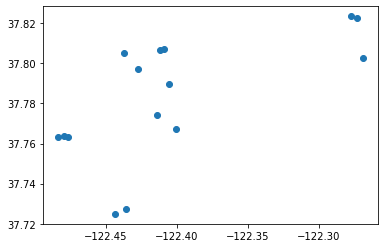

In [10]:
plt.scatter(df_ext.lon, df_ext.lat)

In [11]:
#!pip install zipf
import zipfile

In [12]:
with zipfile.ZipFile('tl_2021_06075_roads.zip', 'r') as zip_ref:
    zip_ref.extractall('shapefiles')

In [13]:
import geopandas as gpd 

In [14]:
# Import shapefile as GeoDataFrame
geo_df = gpd.read_file('shapefiles/tl_2021_06075_roads.shp')

In [15]:
geo_df

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,110498938773,Hwy 101 S Off Rmp,M,S1400,"LINESTRING (-122.40410 37.74842, -122.40397 37..."
1,110498937425,Hwy 101 N on Rmp,M,S1400,"LINESTRING (-122.47441 37.80691, -122.47461 37..."
2,1108475858996,US Hwy 101 Bus,U,S1200,"LINESTRING (-122.42461 37.80130, -122.42460 37..."
3,1103660229533,Ludlow Aly - No Acc,M,S1780,"LINESTRING (-122.45959 37.73853, -122.45956 37..."
4,1104995434770,Old Mason St,M,S1400,"LINESTRING (-122.45456 37.80419, -122.45492 37..."
...,...,...,...,...,...
4078,110498939543,Friendship Ct,M,S1400,"LINESTRING (-122.43073 37.77781, -122.43084 37..."
4079,110498940789,None,None,S1400,"LINESTRING (-122.45077 37.77880, -122.45070 37..."
4080,110498932589,Flint St,M,S1400,"LINESTRING (-122.43654 37.76398, -122.43673 37..."
4081,110498939711,Twin Peaks Blvd,M,S1400,"LINESTRING (-122.44721 37.75404, -122.44687 37..."


In [16]:
df_sf.region_id.unique()

array(['5', '3', '14', '12', '0', '13', nan], dtype=object)

In [17]:
geo_df.loc[geo_df['FULLNAME'] == 'Octavia St']

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
1005,11016957645924,Octavia St,M,S1400,"LINESTRING (-122.42366 37.77178, -122.42369 37..."
2384,110498936857,Octavia St,M,S1400,"LINESTRING (-122.42780 37.79243, -122.42798 37..."
2902,110498936855,Octavia St,M,S1400,"LINESTRING (-122.42667 37.78692, -122.42687 37..."
4052,11016957645925,Octavia St,M,S1400,"LINESTRING (-122.42370 37.77210, -122.42387 37..."
4082,11016957626758,Octavia St,M,S1400,"LINESTRING (-122.42370 37.77210, -122.42366 37..."


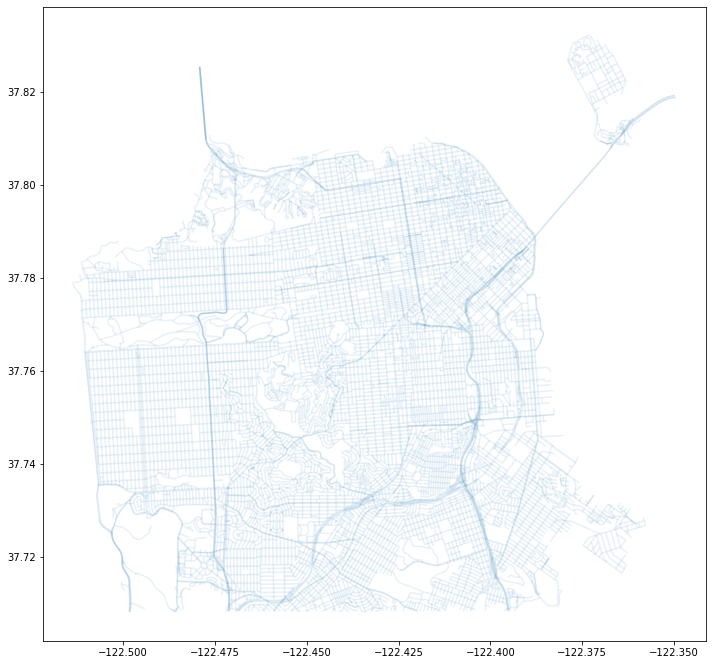

In [18]:
# Initialize our plot
fig, ax = plt.subplots(figsize=(10,10))
# Plot our SF GeoDataFrame
geo_df.plot(ax=ax, alpha = .1)
#ctx.add_basemap(ax)

# Turn off axis
#ax.set_axis_off()
# Save image
fig.tight_layout()

In [19]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

In [20]:
df_sf.loc[df_sf['lon'] < -122.35]

,electric_bike_surcharge_waiver,eightd_station_services,rental_methods,legacy_id,region_id,eightd_has_key_dispenser,station_id,lon,capacity,external_id,short_name,has_kiosk,lat,station_type,name
82,False,[],"[KEY, CREDITCARD]",500,3,False,6732f1f5-616c-46bc-81e6-67c5319b3c73,-122.401715,31,6732f1f5-616c-46bc-81e6-67c5319b3c73,SF-B28-2,True,37.802055,classic,Battery St at Filbert St
83,False,[],"[KEY, CREDITCARD]",399,3,False,43974bf5-147b-4348-aed6-eb29626cb1cf,-122.436064,27,43974bf5-147b-4348-aed6-eb29626cb1cf,SF-B19,True,37.802664,classic,Bay St at Fillmore St
84,False,[],"[KEY, CREDITCARD]",368,3,False,3612155a-0fb2-4e66-8bab-f81979bfe54a,-122.419342,27,3612155a-0fb2-4e66-8bab-f81979bfe54a,SF-G23,True,37.785479,classic,Myrtle St at Polk St
85,False,[],"[KEY, CREDITCARD]",321,3,False,13f59664-7cdd-451c-b4bb-1e8d660164c8,-122.402728,31,13f59664-7cdd-451c-b4bb-1e8d660164c8,SF-I27,True,37.780738,classic,Folsom St at 5th St
86,False,[],"[KEY, CREDITCARD]",90,3,False,e4e5d6b1-a335-41a9-8efe-4c4d9294d6e2,-122.402717,27,e4e5d6b1-a335-41a9-8efe-4c4d9294d6e2,SF-L27,True,37.771058,classic,Townsend St at 7th St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,False,[],"[KEY, CREDITCARD]",515,3,False,37cf6b02-5cb0-4461-bf45-0ae60a1a2fb7,-122.477667,23,37cf6b02-5cb0-4461-bf45-0ae60a1a2fb7,SF-F9,True,37.785111,classic,18th Ave at California St
491,False,"[{'link_for_more_info': '', 'bikes_availabilit...","[CREDITCARD, KEY]",367,NaN,False,367,-122.479407,31,c77092b2-476f-498f-8a15-18c9ee51e920,OutsideTempStation,True,37.770669,classic,Outside Lands (Temporary Station)
492,False,[],"[CREDITCARD, KEY]",577,NaN,False,577,-122.442729,22,82ad4cff-001f-49a8-88fa-a5a63d64b9a2,SF-C18,True,37.799175,classic,Divisadero St at Lombard St
493,False,[],"[CREDITCARD, KEY]",578,NaN,False,578,-122.444305,19,41b2200f-7915-410b-95c6-084bc4d3dee8,SF-X16,True,37.730655,classic,Detroit St at Hearst Ave


In [21]:
# Add a geometry column that holds Point objects
df_sf['geometry'] = df_sf.apply(lambda x: Point(float(x.lon), float(x.lat)), axis=1)
# Convert Pandas DataFrame to a GeoDataFrame
stations_gpdf = gpd.GeoDataFrame(df_sf.loc[df_sf['lon'] < -122.35], geometry='geometry')
# Initialize crs to 4326 because that's the format of our geomtry
#starbucks_geo_df.crs = "EPSG:4326"
# Change the crs to match our SF GeoDataFrame
#starbucks_geo_df = starbucks_geo_df.to_crs(epsg = 3857)


/home/ec2-user/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [22]:
stations_gpdf

,electric_bike_surcharge_waiver,eightd_station_services,rental_methods,legacy_id,region_id,eightd_has_key_dispenser,station_id,lon,capacity,external_id,short_name,has_kiosk,lat,station_type,name,geometry
82,False,[],"[KEY, CREDITCARD]",500,3,False,6732f1f5-616c-46bc-81e6-67c5319b3c73,-122.401715,31,6732f1f5-616c-46bc-81e6-67c5319b3c73,SF-B28-2,True,37.802055,classic,Battery St at Filbert St,POINT (-122.40172 37.80206)
83,False,[],"[KEY, CREDITCARD]",399,3,False,43974bf5-147b-4348-aed6-eb29626cb1cf,-122.436064,27,43974bf5-147b-4348-aed6-eb29626cb1cf,SF-B19,True,37.802664,classic,Bay St at Fillmore St,POINT (-122.43606 37.80266)
84,False,[],"[KEY, CREDITCARD]",368,3,False,3612155a-0fb2-4e66-8bab-f81979bfe54a,-122.419342,27,3612155a-0fb2-4e66-8bab-f81979bfe54a,SF-G23,True,37.785479,classic,Myrtle St at Polk St,POINT (-122.41934 37.78548)
85,False,[],"[KEY, CREDITCARD]",321,3,False,13f59664-7cdd-451c-b4bb-1e8d660164c8,-122.402728,31,13f59664-7cdd-451c-b4bb-1e8d660164c8,SF-I27,True,37.780738,classic,Folsom St at 5th St,POINT (-122.40273 37.78074)
86,False,[],"[KEY, CREDITCARD]",90,3,False,e4e5d6b1-a335-41a9-8efe-4c4d9294d6e2,-122.402717,27,e4e5d6b1-a335-41a9-8efe-4c4d9294d6e2,SF-L27,True,37.771058,classic,Townsend St at 7th St,POINT (-122.40272 37.77106)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,False,[],"[KEY, CREDITCARD]",515,3,False,37cf6b02-5cb0-4461-bf45-0ae60a1a2fb7,-122.477667,23,37cf6b02-5cb0-4461-bf45-0ae60a1a2fb7,SF-F9,True,37.785111,classic,18th Ave at California St,POINT (-122.47767 37.78511)
491,False,"[{'link_for_more_info': '', 'bikes_availabilit...","[CREDITCARD, KEY]",367,NaN,False,367,-122.479407,31,c77092b2-476f-498f-8a15-18c9ee51e920,OutsideTempStation,True,37.770669,classic,Outside Lands (Temporary Station),POINT (-122.47941 37.77067)
492,False,[],"[CREDITCARD, KEY]",577,NaN,False,577,-122.442729,22,82ad4cff-001f-49a8-88fa-a5a63d64b9a2,SF-C18,True,37.799175,classic,Divisadero St at Lombard St,POINT (-122.44273 37.79918)
493,False,[],"[CREDITCARD, KEY]",578,NaN,False,578,-122.444305,19,41b2200f-7915-410b-95c6-084bc4d3dee8,SF-X16,True,37.730655,classic,Detroit St at Hearst Ave,POINT (-122.44430 37.73066)


Text(0.5, 1.0, 'Baywheels Stations in San Francisco')

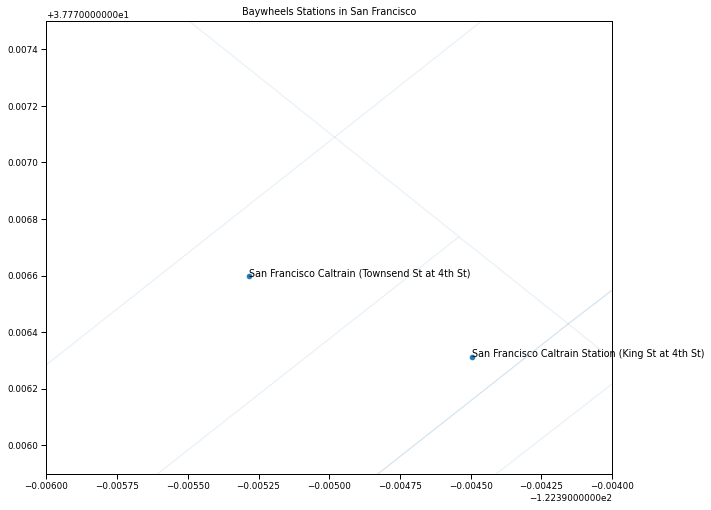

In [23]:
# Change context for readability
sns.set_context("paper")
# Initialize our plot
fig, ax = plt.subplots(figsize=(10, 10))
# Plot our SF GeoDataFrame
geo_df.plot(ax=ax, alpha = .1)
# Plot our Starbucks locations
stations_gpdf.plot(ax=ax)

min_lat, max_lat = (37.7759, 37.7775)
min_lon, max_lon = (-122.396, -122.394)

for point in stations_gpdf.loc[(stations_gpdf['lon'].between(min_lon, max_lon))
                               & (stations_gpdf['lat'].between(min_lat, max_lat))].index:
    ax.text(stations_gpdf.loc[point]['lon'], stations_gpdf.loc[point]['lat'], stations_gpdf.loc[point]['name'])
# Add in a background using contextily
#ctx.add_basemap(ax)
# Turn off axis
ax.set_xlim((min_lon, max_lon))
ax.set_ylim((min_lat, max_lat))
#ax.set_axis_off()
fig.tight_layout()
plt.title("Baywheels Stations in San Francisco")

<AxesSubplot:>

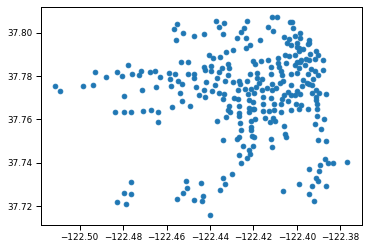

In [24]:
stations_gpdf.plot()

In [25]:
!ls

creds.yaml	     mapping.ipynb     shapefiles
direction_api.ipynb  README.md	       test_data
etl.ipynb	     requirements.txt  tl_2021_06075_roads.zip


In [26]:
new_data = pd.read_pickle('test_data')

In [31]:
new_data.head()

,index,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
9,586,electric_bike,2022-04-03 10:41:53,2022-04-03 11:13:38,Commercial St at Montgomery St,SF-E27,Union Square (Powell St at Post St),SF-F26,37.794143,-122.402867,37.788300,-122.408531,casual
91,15773,electric_bike,2022-04-03 11:59:20,2022-04-03 12:11:30,Commercial St at Montgomery St,SF-E27,Chestnut St at Van Ness Ave,SF-B22,37.794066,-122.402945,37.802300,-122.424413,casual
92,15774,electric_bike,2022-04-03 13:18:36,2022-04-03 13:46:13,Commercial St at Montgomery St,SF-E27,18th St at Noe St,SF-O19,37.794093,-122.403066,37.761047,-122.432642,casual
124,18318,classic_bike,2022-04-03 11:25:03,2022-04-03 11:33:58,Commercial St at Montgomery St,SF-E27,Jones St at Post St,SF-G25,37.794246,-122.402855,37.787327,-122.413278,member
166,32564,electric_bike,2022-04-03 12:05:38,2022-04-03 12:19:04,Commercial St at Montgomery St,SF-E27,Washington St at Van Ness Ave,SF-E22,37.793875,-122.402611,37.792980,-122.423302,member


In [32]:
new_data['geometry'] = new_data.apply(lambda x: Point(float(x.end_lng), float(x.end_lat)), axis=1)

/home/ec2-user/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [33]:
new_data

,index,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,geometry
9,586,electric_bike,2022-04-03 10:41:53,2022-04-03 11:13:38,Commercial St at Montgomery St,SF-E27,Union Square (Powell St at Post St),SF-F26,37.794143,-122.402867,37.788300,-122.408531,casual,POINT (-122.40853071212769 37.788299978150825)
91,15773,electric_bike,2022-04-03 11:59:20,2022-04-03 12:11:30,Commercial St at Montgomery St,SF-E27,Chestnut St at Van Ness Ave,SF-B22,37.794066,-122.402945,37.802300,-122.424413,casual,POINT (-122.4244135 37.8023)
92,15774,electric_bike,2022-04-03 13:18:36,2022-04-03 13:46:13,Commercial St at Montgomery St,SF-E27,18th St at Noe St,SF-O19,37.794093,-122.403066,37.761047,-122.432642,casual,POINT (-122.4326417 37.7610471)
124,18318,classic_bike,2022-04-03 11:25:03,2022-04-03 11:33:58,Commercial St at Montgomery St,SF-E27,Jones St at Post St,SF-G25,37.794246,-122.402855,37.787327,-122.413278,member,POINT (-122.41327822208405 37.7873267660624)
166,32564,electric_bike,2022-04-03 12:05:38,2022-04-03 12:19:04,Commercial St at Montgomery St,SF-E27,Washington St at Van Ness Ave,SF-E22,37.793875,-122.402611,37.792980,-122.423302,member,POINT (-122.4233016371727 37.792979854977766)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32341,135155,electric_bike,2022-03-03 17:04:38,2022-03-03 17:17:49,Commercial St at Montgomery St,SF-E27,St. Joseph's Ave at Geary Blvd,SF-H17,37.793994,-122.403130,37.782574,-122.442203,member,POINT (-122.442203 37.782574)
32398,179465,electric_bike,2022-03-03 13:18:38,2022-03-03 13:27:47,Commercial St at Montgomery St,SF-E27,None,None,37.793962,-122.402751,37.790000,-122.410000,member,POINT (-122.41 37.79)
32446,179481,electric_bike,2022-03-03 06:27:56,2022-03-03 06:29:54,Commercial St at Montgomery St,SF-E27,None,None,37.793935,-122.402910,37.790000,-122.400000,member,POINT (-122.4 37.79)
32467,181087,electric_bike,2022-03-03 15:34:26,2022-03-03 15:51:12,Commercial St at Montgomery St,SF-E27,None,None,37.794135,-122.402972,37.770000,-122.410000,casual,POINT (-122.41 37.77)


In [34]:
new_data_gpdf = gpd.GeoDataFrame(new_data, geometry='geometry')

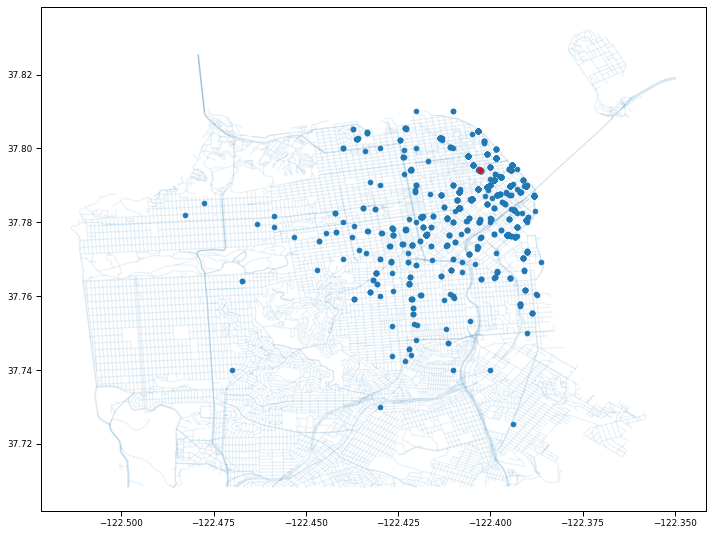

In [40]:
# Change context for readability
sns.set_context("paper")
# Initialize our plot
fig, ax = plt.subplots(figsize=(10, 10))
# Plot our SF GeoDataFrame
geo_df.plot(ax=ax, alpha = .1)
new_data_gpdf.plot(ax=ax)
stations_gpdf.loc[stations_gpdf['name'] == 'Commercial St at Montgomery St'].plot(ax=ax, color='red')
fig.tight_layout()

,electric_bike_surcharge_waiver,eightd_station_services,rental_methods,legacy_id,region_id,eightd_has_key_dispenser,station_id,lon,capacity,external_id,short_name,has_kiosk,lat,station_type,name,geometry
355,False,[],"[KEY, CREDITCARD]",13,3,False,e82e7160-d8fb-452b-8f27-c0f75926d080,-122.402855,23,e82e7160-d8fb-452b-8f27-c0f75926d080,SF-E27,True,37.794246,classic,Commercial St at Montgomery St,POINT (-122.40286 37.79425)
